Import Libraries

In [78]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

Load built-in MNIST dataset

In [79]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

Using either OpenCV or Matplotlib, view some random samples

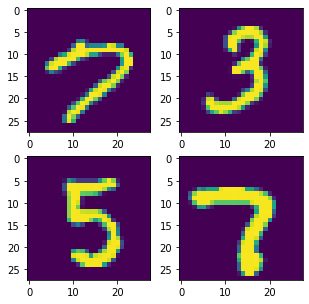

In [114]:
[row, col] = [2, 2] # Don't use ones for row and col

limit = row * col

fig, axs = plt.subplots(int(limit/col), int(col), figsize=(5, 5))

for x in range(limit):
    test = train_images[np.random.randint(60000)]
    test = np.reshape(test, (28, 28))
    axs[int(x/col), x%col].imshow(test)

